## Bay Wheels Bike Sharing System Usage Pattern 2019/2020

#### by Simer Anand

## Investigation Overview

> [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. 

## Dataset Overview

> The dataset we have used in this exploration analysis comprises of the last 12 months of the data i.e., from September, 2019 to August, 2020. The dataset for each month is made availabe by Bay wheels on its website [baywheels](https://s3.amazonaws.com/baywheels-data/index.html), the data is available in CSV format. For this analysis, the extracted data have been wrangled and cleaned to explore and visualise relationship between different columns of data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import os
import glob

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# file name : fordbike_master.csv

bike_df = pd.read_csv('fordbike_master.csv')

### 1. Number of riders on monthly basis and what is the impact of the Covid-19 on the bike rides?
> Given the data and the current situation due to `COVID-19` lockdowns across the US. As you can see in the below graphs the number of rides were `growing` from `September in the 2019` and in the `first two months of the 2020` and ridership numbers `fell` in `March` and dipped further in the `April`. Since `April` the ridership is `gradually increasing` but still half of what we saw in the first two months of the `2020`.

#### (i) Last 12 months of data from `September, 2019` to `August, 2020`.
- `Sub Slide below`

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

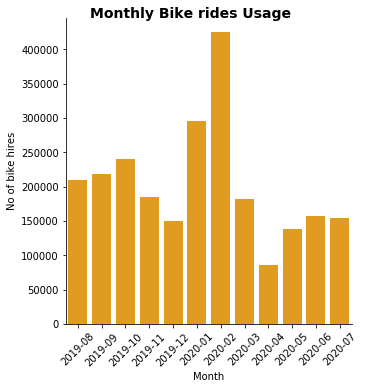

In [8]:
graph = sb.catplot(data=bike_df.sort_values(by='month_year'), x='month_year', kind='count', color='orange')
graph.set_axis_labels("Month", "No of bike hires")
graph.fig.suptitle('Monthly Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 45)

#### (ii) Data only from the year 2020 to see closely the impact of the covid,
- `Sub Slide below`

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

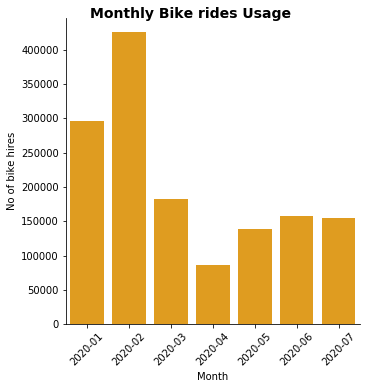

In [7]:
graph = sb.catplot(data=bike_df.query('month_year > "2019-12"').sort_values(by='month_year'), x='month_year', kind='count', color='orange')
graph.set_axis_labels("Month", "No of bike hires")
graph.fig.suptitle('Monthly Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 45)


### 2. Number of riders on hour basis on an average day?

#### (i) Hourly all time trend of bike users.
> Want to see what the hourly usage of the bike looks like on any day for all type of the users. `50000` riders in the morning `6am` and the number increases to quater million bike rides by `8am`. Through this visualisation we see most of the users are before the business hour and after the business hours. Peak usages are before `9 AM` and after `5 PM`. 
 - `see the slide below`

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

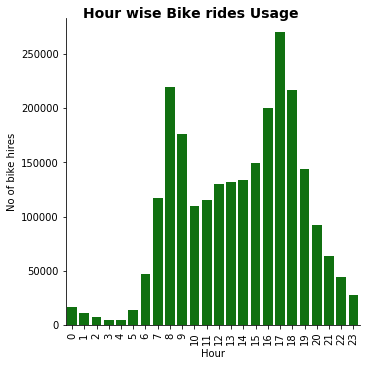

In [9]:
graph = sb.catplot(data=bike_df, x='hour', kind='count', color='green')
graph.set_axis_labels("Hour", "No of bike hires")
graph.fig.suptitle('Hour wise Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 90)

#### (ii) Curious to know if the trend in the post COVID-19 error.
- Interestingly, the visual below tells us in the COVID-19 era especially from months `March till August`, we see the peak times have shifted to the end of the day, what we see is `Negative Skewness`.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

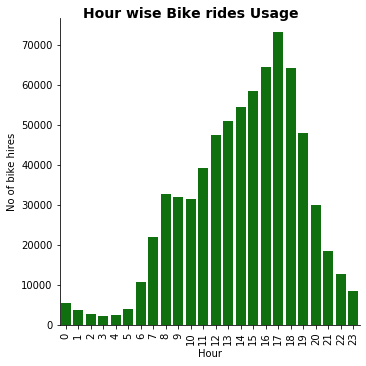

In [21]:
graph = sb.catplot(data=bike_df.query('month_year > "2020-02"'), x='hour', kind='count', color='green')
graph.set_axis_labels("Hour", "No of bike hires")
graph.fig.suptitle('Hour wise Bike rides Usage', y=1, fontsize=14, fontweight='semibold');
plt.xticks(rotation = 90)

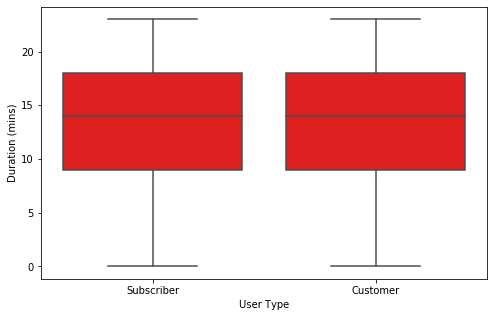

In [20]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = bike_df.query('duration_sec < 5'), x = 'user_type', y = 'hour', color = 'red')

plt.xlabel('User Type')
plt.ylabel('Duration (mins)')
plt.show()